### In this tutorial, you will discover how you can use Keras to develop and evaluate neural network models for multi-class classification problems.



### Load Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('iris.data', header=None)

Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

In [3]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


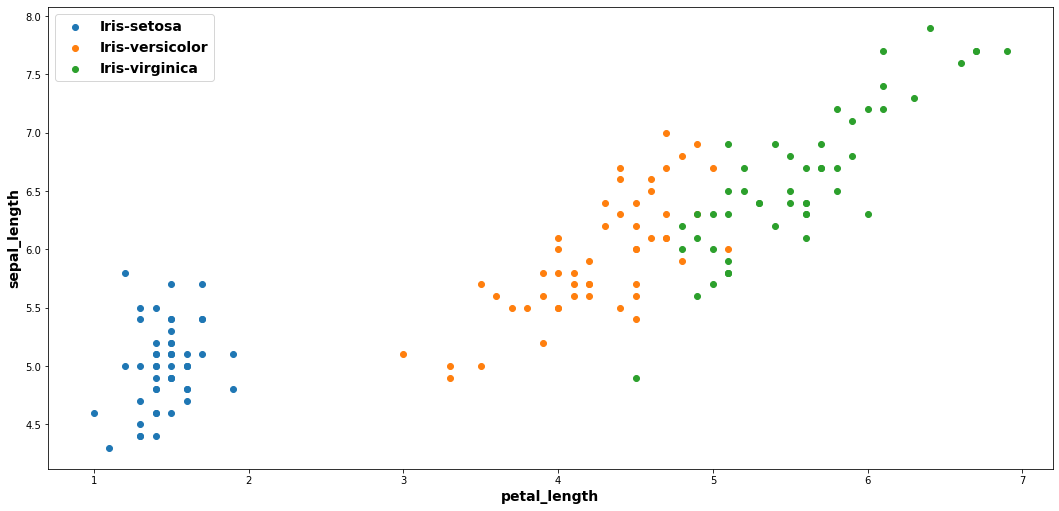

In [18]:
fig,ax = plt.subplots()
fig.set_size_inches(18, 8.5)
legend_properties = {'weight':'bold', 'size':14 }
for k,d in df.groupby('species'):
    ax.scatter(d['petal_length'], d['sepal_length'], label=k)
plt.legend(loc=2, prop=legend_properties)
plt.xlabel('petal_length', fontweight='bold', fontsize=14)
plt.ylabel('sepal_length', fontweight='bold', fontsize=14)
plt.show()

In [38]:
#dataset = df.values  # numpy.ndarray

In [39]:
dataset[0:10]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa']], dtype=object)

# Test Train Split | Encode Output variable(y)

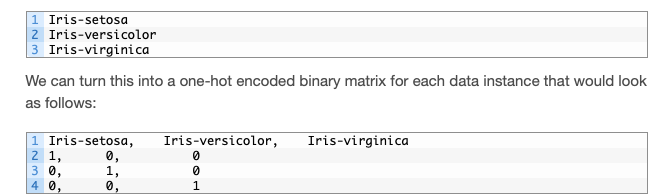


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical,

In [41]:
# X = dataset[:,0:4].astype(float)
# y = dataset[:,4]

In [8]:
X = df.drop(['species'], axis = 1)
X = np.array(X)
y = df['species']

In [9]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
y = to_categorical(y)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Define the Neural Network Model

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

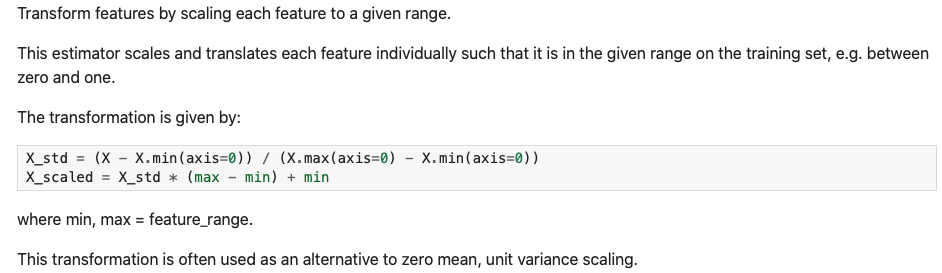

In [24]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_test = scaler.transform(X_test)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [138]:
X_train.shape

(112, 4)

In [139]:
X_test.shape

(38, 4)

In [140]:
y_train.shape

(112, 3)

In [141]:
y_test.shape

(38, 3)

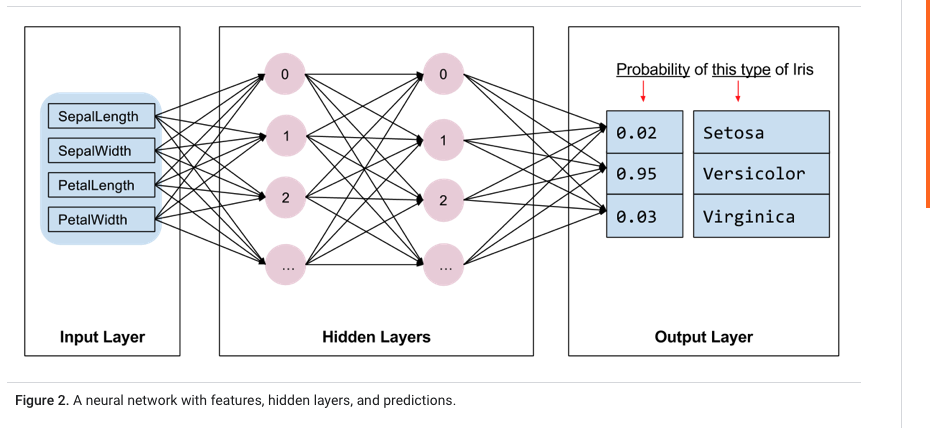

In [43]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

input_dim is the number of dimensions of the features, in your case that is just 4. The equivalent notation for input_shape, which is an actual dimensional shape, is (4,)

The Softmax regression is a form of logistic regression that normalizes an input value into a vector of values that follows a probability distribution whose total sums up to 1. The output values are between the range [0,1] which is nice because we are able to avoid binary classification and accommodate as many classes or dimensions in our neural network model. This is why softmax is sometimes referred to as a multinomial logistic regression.

In [44]:
model.fit(x=X_train, y=y_train, epochs=200, batch_size=5, validation_data=(X_test,y_test))

Epoch 1/200
23/23 [==============================] - 0s 6ms/step - loss: 1.0495 - accuracy: 0.2946 - val_loss: 1.0145 - val_accuracy: 0.3947
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 0.9962 - accuracy: 0.3750 - val_loss: 0.9721 - val_accuracy: 0.4211
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 0.9549 - accuracy: 0.4821 - val_loss: 0.9368 - val_accuracy: 0.5789
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 0.9209 - accuracy: 0.6071 - val_loss: 0.9037 - val_accuracy: 0.6579
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 0.8907 - accuracy: 0.6250 - val_loss: 0.8730 - val_accuracy: 0.6842
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 0.8634 - accuracy: 0.6429 - val_loss: 0.8437 - val_accuracy: 0.7105
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 0.8399 - accuracy: 0.6518 - val_loss: 0.8151 - val_accuracy: 0.7105
Epoch 8/200
2

Epoch 59/200
23/23 [==============================] - 0s 3ms/step - loss: 0.3990 - accuracy: 0.9286 - val_loss: 0.3491 - val_accuracy: 0.9474
Epoch 60/200
23/23 [==============================] - 0s 3ms/step - loss: 0.3961 - accuracy: 0.9375 - val_loss: 0.3462 - val_accuracy: 0.9474
Epoch 61/200
23/23 [==============================] - 0s 3ms/step - loss: 0.3921 - accuracy: 0.9464 - val_loss: 0.3430 - val_accuracy: 0.9474
Epoch 62/200
23/23 [==============================] - 0s 3ms/step - loss: 0.3890 - accuracy: 0.9464 - val_loss: 0.3398 - val_accuracy: 0.9474
Epoch 63/200
23/23 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.9375 - val_loss: 0.3368 - val_accuracy: 0.9474
Epoch 64/200
23/23 [==============================] - 0s 4ms/step - loss: 0.3828 - accuracy: 0.9464 - val_loss: 0.3335 - val_accuracy: 0.9474
Epoch 65/200
23/23 [==============================] - 0s 3ms/step - loss: 0.3796 - accuracy: 0.9464 - val_loss: 0.3306 - val_accuracy: 0.9474
Epoch 

23/23 [==============================] - 0s 3ms/step - loss: 0.1592 - accuracy: 0.9732 - val_loss: 0.1281 - val_accuracy: 0.9737
Epoch 174/200
23/23 [==============================] - 0s 3ms/step - loss: 0.1579 - accuracy: 0.9732 - val_loss: 0.1275 - val_accuracy: 0.9737
Epoch 175/200
23/23 [==============================] - 0s 3ms/step - loss: 0.1567 - accuracy: 0.9732 - val_loss: 0.1263 - val_accuracy: 0.9737
Epoch 176/200
23/23 [==============================] - 0s 3ms/step - loss: 0.1557 - accuracy: 0.9732 - val_loss: 0.1253 - val_accuracy: 0.9737
Epoch 177/200
23/23 [==============================] - 0s 3ms/step - loss: 0.1553 - accuracy: 0.9732 - val_loss: 0.1245 - val_accuracy: 0.9737
Epoch 178/200
23/23 [==============================] - 0s 3ms/step - loss: 0.1554 - accuracy: 0.9732 - val_loss: 0.1238 - val_accuracy: 0.9737
Epoch 179/200
23/23 [==============================] - 0s 3ms/step - loss: 0.1540 - accuracy: 0.9643 - val_loss: 0.1222 - val_accuracy: 0.9737
Epoch 180/200

In [31]:
losses = pd.DataFrame(model.history.history)

   ### PLOT

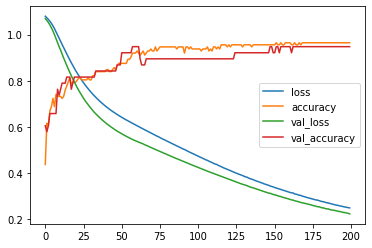

In [32]:
losses.plot()

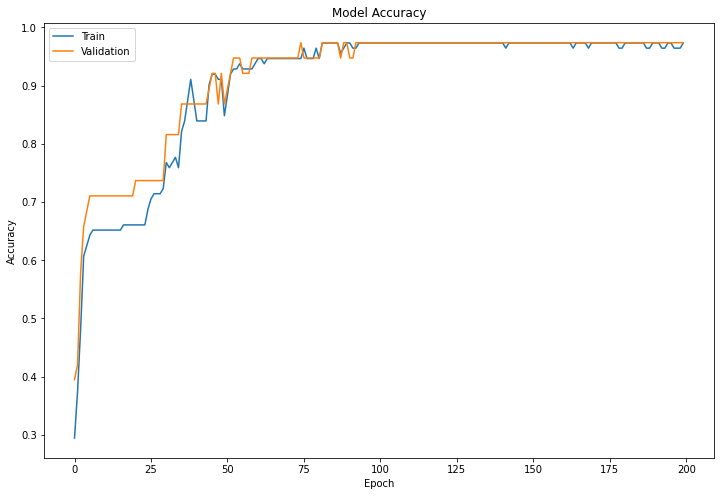

In [53]:
plt.figure(figsize=(12,8))
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

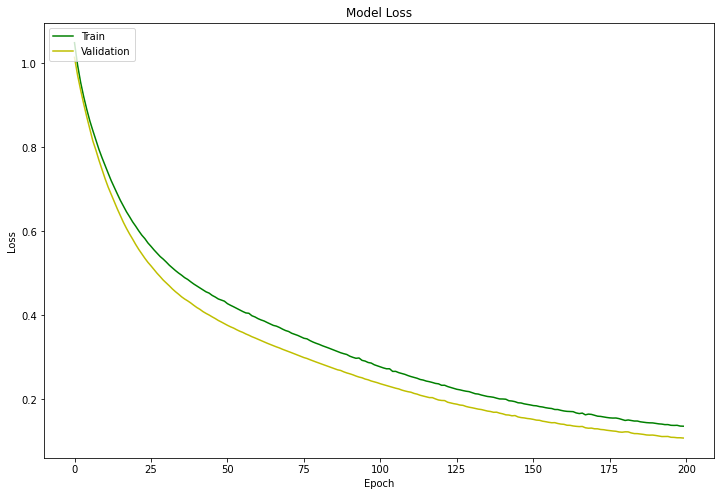

In [54]:
# "Loss"
plt.figure(figsize=(12,8))
plt.plot(model.history.history['loss'], 'g' )
plt.plot(model.history.history['val_loss'], 'y')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### PREDICTIONS | ACCURACY


In [91]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [146]:
predictions = model.predict_classes(X_test)

In [147]:
X_test

array([[ 0.52941176,  0.36363636,  0.64285714,  0.45833333],
       [ 0.41176471,  0.81818182,  0.10714286,  0.08333333],
       [ 1.        ,  0.27272727,  1.03571429,  0.91666667],
       [ 0.5       ,  0.40909091,  0.60714286,  0.58333333],
       [ 0.73529412,  0.36363636,  0.66071429,  0.54166667],
       [ 0.32352941,  0.63636364,  0.07142857,  0.125     ],
       [ 0.38235294,  0.40909091,  0.44642857,  0.5       ],
       [ 0.76470588,  0.5       ,  0.71428571,  0.91666667],
       [ 0.55882353,  0.09090909,  0.60714286,  0.58333333],
       [ 0.44117647,  0.31818182,  0.5       ,  0.45833333],
       [ 0.64705882,  0.54545455,  0.71428571,  0.79166667],
       [ 0.14705882,  0.45454545,  0.05357143,  0.        ],
       [ 0.35294118,  0.68181818,  0.03571429,  0.04166667],
       [ 0.17647059,  0.5       ,  0.07142857,  0.        ],
       [ 0.23529412,  0.81818182,  0.07142857,  0.08333333],
       [ 0.58823529,  0.59090909,  0.64285714,  0.625     ],
       [ 0.64705882,  0.

In [148]:
predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [152]:
predictions = to_categorical(predictions)

In [151]:
y_test

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [153]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

   micro avg       0.97      0.97      0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38
 samples avg       0.97      0.97      0.97        38



In [154]:
print(confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1)))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


In [155]:
# how much variance is being explained by the model
explained_variance_score(y_test,predictions)

0.9189436435699463

In [55]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Predictions

In [56]:
single_iris = df.drop('species', axis=1).iloc[0]

In [57]:
single_iris

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

In [58]:
single_iris = scaler.transform(single_iris.values.reshape(-1,4))

In [59]:
single_iris

array([[0.23529412, 0.68181818, 0.05357143, 0.04166667]])

In [104]:
model_percent = model.predict(single_iris)

for inner_list in model_percent:
    for index,val in enumerate(inner_list):
        
        prediction_ = np.argmax(to_categorical([index]), axis = 1)
        prediction_ = encoder.inverse_transform([index])
        
        prediction_ = str(prediction_).strip('[').strip(']')
        print("{0:.2%} likely to be an {1}".format((val), prediction_))

99.43% likely to be an 'Iris-setosa'
0.57% likely to be an 'Iris-versicolor'
0.00% likely to be an 'Iris-virginica'


In [75]:
#x = model.predict_classes(single_iris)
x = [1]
print(x)
prediction_ = np.argmax(to_categorical(x), axis = 1)
prediction_ = encoder.inverse_transform(x)

[1]


In [76]:
prediction_

array(['Iris-versicolor'], dtype=object)

In [204]:
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa


### EarlyStopping

In [98]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [99]:
from tensorflow.keras.callbacks import EarlyStopping

In [100]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25) # want to min losses

In [101]:
model.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/200
4/4 [==============================] - 0s 21ms/step - loss: 0.7066 - val_loss: 0.7040
Epoch 2/200
4/4 [==============================] - 0s 7ms/step - loss: 0.7013 - val_loss: 0.6994
Epoch 3/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6960 - val_loss: 0.6948
Epoch 4/200
4/4 [==============================] - 0s 8ms/step - loss: 0.6909 - val_loss: 0.6905
Epoch 5/200
4/4 [==============================] - 0s 8ms/step - loss: 0.6859 - val_loss: 0.6862
Epoch 6/200
4/4 [==============================] - 0s 8ms/step - loss: 0.6816 - val_loss: 0.6821
Epoch 7/200
4/4 [==============================] - 0s 8ms/step - loss: 0.6770 - val_loss: 0.6784
Epoch 8/200
4/4 [==============================] - 0s 8ms/step - loss: 0.6730 - val_loss: 0.6748
Epoch 9/200
4/4 [==============================] - 0s 8ms/step - loss: 0.6692 - val_loss: 0.6716
Epoch 10/200
4/4 [==============================] - 0s 9ms/step - loss: 0.6654 - val_loss: 0.6688
Epoch 11/200
4/4 [==========

4/4 [==============================] - 0s 8ms/step - loss: -1.5640 - val_loss: -1.1930
Epoch 166/200
4/4 [==============================] - 0s 7ms/step - loss: -1.5953 - val_loss: -1.2198
Epoch 167/200
4/4 [==============================] - 0s 8ms/step - loss: -1.6275 - val_loss: -1.2469
Epoch 168/200
4/4 [==============================] - 0s 7ms/step - loss: -1.6595 - val_loss: -1.2741
Epoch 169/200
4/4 [==============================] - 0s 7ms/step - loss: -1.6864 - val_loss: -1.3023
Epoch 170/200
4/4 [==============================] - 0s 7ms/step - loss: -1.7226 - val_loss: -1.3298
Epoch 171/200
4/4 [==============================] - 0s 7ms/step - loss: -1.7549 - val_loss: -1.3579
Epoch 172/200
4/4 [==============================] - 0s 7ms/step - loss: -1.7853 - val_loss: -1.3873
Epoch 173/200
4/4 [==============================] - 0s 7ms/step - loss: -1.8178 - val_loss: -1.4173
Epoch 174/200
4/4 [==============================] - 0s 7ms/step - loss: -1.8530 - val_loss: -1.4473
Epoc

In [102]:
es_losses = pd.DataFrame(model.history.history)

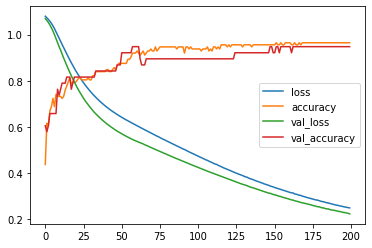

In [30]:
losses.plot()

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test, predictions))

### Dropout Layers

In [106]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5)) # 1 means 100% of neurons are going to be turn off randomly

model.add(Dense(2, activation='relu'))
model.add(Dropout(0.5))
# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [107]:
from tensorflow.keras.layers import Dropout

In [108]:
model.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/200
4/4 [==============================] - 0s 20ms/step - loss: 0.6902 - val_loss: 0.6916
Epoch 2/200
4/4 [==============================] - 0s 8ms/step - loss: 0.6873 - val_loss: 0.6901
Epoch 3/200
4/4 [==============================] - 0s 8ms/step - loss: 0.6845 - val_loss: 0.6886
Epoch 4/200
4/4 [==============================] - 0s 8ms/step - loss: 0.6847 - val_loss: 0.6871
Epoch 5/200
4/4 [==============================] - 0s 8ms/step - loss: 0.6809 - val_loss: 0.6856
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6755 - val_loss: 0.6842
Epoch 7/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6766 - val_loss: 0.6827
Epoch 8/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6665 - val_loss: 0.6811
Epoch 9/200
4/4 [==============================] - 0s 12ms/step - loss: 0.6679 - val_loss: 0.6791
Epoch 10/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6636 - val_loss: 0.6768
Epoch 11/200
4/4 [=========

4/4 [==============================] - 0s 10ms/step - loss: -1.4656 - val_loss: -1.3137
Epoch 166/200
4/4 [==============================] - 0s 9ms/step - loss: -1.0630 - val_loss: -1.3374
Epoch 167/200
4/4 [==============================] - 0s 10ms/step - loss: -1.7092 - val_loss: -1.3610
Epoch 168/200
4/4 [==============================] - 0s 10ms/step - loss: -1.8919 - val_loss: -1.3857
Epoch 169/200
4/4 [==============================] - 0s 9ms/step - loss: -2.1529 - val_loss: -1.4104
Epoch 170/200
4/4 [==============================] - 0s 9ms/step - loss: -2.7012 - val_loss: -1.4387
Epoch 171/200
4/4 [==============================] - 0s 10ms/step - loss: -1.1071 - val_loss: -1.4650
Epoch 172/200
4/4 [==============================] - 0s 13ms/step - loss: -2.0793 - val_loss: -1.4909
Epoch 173/200
4/4 [==============================] - 0s 9ms/step - loss: -1.9796 - val_loss: -1.5171
Epoch 174/200
4/4 [==============================] - 0s 8ms/step - loss: -3.0799 - val_loss: -1.5446

In [109]:
model_dl_loss = pd.DataFrame(model.history.history)

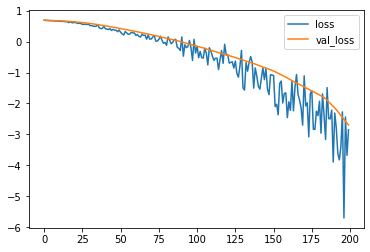

In [111]:
model_dl_loss.plot()

In [112]:
predictions = model.predict_classes(X_test)

In [114]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.29      1.00      0.45        11
           2       0.00      0.00      0.00        12

    accuracy                           0.29        38
   macro avg       0.10      0.33      0.15        38
weighted avg       0.08      0.29      0.13        38



In [115]:
print(confusion_matrix(y_test,predictions))

[[ 0 15  0]
 [ 0 11  0]
 [ 0 12  0]]
